32 50


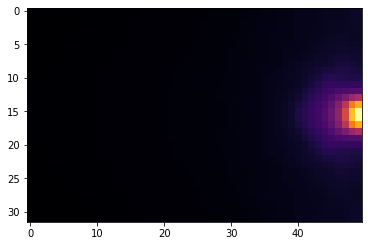

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
from mplsoccer.pitch import Pitch, add_image
from matplotlib.colors import to_rgba
from PIL import Image
from urllib.request import urlopen
from matplotlib import cm
from matplotlib import colorbar

pd.set_option("display.max_rows", 11)
pd.set_option("display.max_columns", None)
pd.set_option("display.width", None)

df = pd.read_csv("Bissouma Test.csv")

#Import EPV
epv = pd.read_csv("EPV_grid.csv", header=None)
epv = np.array(epv)
epv_rows, epv_cols = epv.shape
print(epv_rows, epv_cols)
plt.imshow(epv, cmap="inferno")

#Import xT
xT = pd.read_csv("Expected_Threat.csv", header=None)
xT = np.array(xT)
xT_rows, xT_cols = xT.shape

# Renaming the column for easier reference
df = df.rename(columns={"type/displayName":"type", "outcomeType/displayName":"outcome"})

In [26]:
# teamid im interested in
df = df[df["teamId"]==211]

#Better Measure of Time
df["newsecond"]=60*df["minute"]+df["second"]
df.sort_values(by=['newsecond'])

# creating 2 new columns with passerid for both the passer and recip
df["passer"] = df["playerId"]
df["recipient"] = df["playerId"].shift(-1)

In [27]:
# creating df of successful passes
passes = df[df["type"]=="Pass"]
successful = passes[passes["outcome"]=="Successful"]

#print(successful.head(10))

# creating df for first sub
subs = df[df["type"]=="SubstitutionOff"]
subs = subs["minute"]
firstSub = subs.min()

# successful df before the first sub is made
successful = successful[successful["minute"]<firstSub]

print(firstSub)
successful

45


,id,eventId,minute,second,teamId,x,y,expandedMinute,period/value,period/displayName,type/value,type,outcomeType/value,outcome,isTouch,playerId,qualifiers/0/type/value,qualifiers/0/type/displayName,qualifiers/0/value,qualifiers/1/type/value,qualifiers/1/type/displayName,qualifiers/1/value,qualifiers/2/type/value,qualifiers/2/type/displayName,qualifiers/2/value,qualifiers/3/type/value,qualifiers/3/type/displayName,qualifiers/3/value,qualifiers/4/type/value,qualifiers/4/type/displayName,qualifiers/4/value,satisfiedEventsTypes/0,satisfiedEventsTypes/1,satisfiedEventsTypes/2,satisfiedEventsTypes/3,satisfiedEventsTypes/4,satisfiedEventsTypes/5,satisfiedEventsTypes/6,endX,endY,qualifiers/5/type/value,qualifiers/5/type/displayName,qualifiers/5/value,qualifiers/6/type/value,qualifiers/6/type/displayName,satisfiedEventsTypes/7,satisfiedEventsTypes/8,qualifiers/6/value,qualifiers/7/type/value,qualifiers/7/type/displayName,qualifiers/7/value,qualifiers/8/type/value,qualifiers/8/type/displayName,qualifiers/8/value,qualifiers/9/type/value,qualifiers/9/type/displayName,satisfiedEventsTypes/9,satisfiedEventsTypes/10,satisfiedEventsTypes/11,satisfiedEventsTypes/12,relatedEventId,relatedPlayerId,goalMouthZ,goalMouthY,isShot,qualifiers/10/type/value,qualifiers/10/type/displayName,qualifiers/10/value,qualifiers/11/type/value,qualifiers/11/type/displayName,qualifiers/12/type/value,qualifiers/12/type/displayName,qualifiers/12/value,blockedX,blockedY,qualifiers/9/value,satisfiedEventsTypes/13,satisfiedEventsTypes/14,qualifiers/11/value,qualifiers/13/type/value,qualifiers/13/type/displayName,qualifiers/13/value,isGoal,qualifiers/14/type/value,qualifiers/14/type/displayName,newsecond,passer,recipient
2,2249283879,3,0,1.0,211,50.0,50.0,0,1,FirstHalf,1,Pass,1,Successful,True,119822.0,140.0,PassEndX,32.1,141.0,PassEndY,50.7,213.0,Angle,3.1,56.0,Zone,Back,212.0,Length,18.8,90.0,116.0,29.0,34.0,36.0,214.0,217.0,32.1,50.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,119822.0,109922.0
10,2249283997,7,0,12.0,211,53.8,82.0,0,1,FirstHalf,1,Pass,1,Successful,True,21683.0,213.0,Angle,1.7,212.0,Length,9.2,141.0,PassEndY,95.4,140.0,PassEndX,52.5,56.0,Zone,Left,90.0,118.0,116.0,29.0,34.0,36.0,215.0,52.5,95.4,NaN,NaN,NaN,NaN,NaN,217.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.0,21683.0,122926.0
11,2249284029,8,0,14.0,211,52.5,95.4,0,1,FirstHalf,1,Pass,1,Successful,True,122926.0,56.0,Zone,Left,140.0,PassEndX,65.9,212.0,Length,14.2,213.0,Angle,6.1,141.0,PassEndY,92.1,90.0,118.0,116.0,29.0,35.0,37.0,215.0,65.9,92.1,NaN,NaN,NaN,NaN,NaN,217.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.0,122926.0,119822.0
14,2249284225,11,0,29.0,211,72.5,100.0,0,1,FirstHalf,1,Pass,1,Successful,True,122926.0,107.0,ThrowIn,NaN,56.0,Zone,Center,141.0,PassEndY,72.4,212.0,Length,20.3,213.0,Angle,4.6,90.0,211.0,34.0,37.0,216.0,NaN,NaN,69.8,72.4,140.0,PassEndX,69.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.0,122926.0,303096.0
17,2249284243,12,0,35.0,211,70.2,29.2,0,1,FirstHalf,1,Pass,1,Successful,True,303096.0,56.0,Zone,Right,213.0,Angle,4.3,141.0,PassEndY,11.7,140.0,PassEndX,64.7,212.0,Length,13.2,90.0,118.0,116.0,29.0,34.0,37.0,215.0,64.7,11.7,NaN,NaN,NaN,NaN,NaN,217.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.0,303096.0,322036.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,.

In [28]:
#Bin Data EPV
successful['x1_bin'] = pd.cut(successful['x'], bins=epv_cols, labels=False)
successful['x2_bin'] = pd.cut(successful['endX'], bins=epv_cols, labels=False)
successful['y1_bin'] = pd.cut(successful['y'], bins=epv_rows, labels=False)
successful['y2_bin'] = pd.cut(successful['endY'], bins=epv_rows, labels=False)

#Return Bin Values EPV
successful['start_zone_value'] = successful[['x1_bin', 'y1_bin']].apply(lambda x: epv[x[1]][x[0]], axis=1)
successful['end_zone_value'] = successful[['x2_bin', 'y2_bin']].apply(lambda x: epv[x[1]][x[0]], axis=1)

#Calculate Difference EPV
successful['epv'] = successful['end_zone_value'] - successful['start_zone_value']

#Remove Bin Columns EPV
successful = successful[[col for col in successful.columns if 'bin' not in col]]

successful

,id,eventId,minute,second,teamId,x,y,expandedMinute,period/value,period/displayName,type/value,type,outcomeType/value,outcome,isTouch,playerId,qualifiers/0/type/value,qualifiers/0/type/displayName,qualifiers/0/value,qualifiers/1/type/value,qualifiers/1/type/displayName,qualifiers/1/value,qualifiers/2/type/value,qualifiers/2/type/displayName,qualifiers/2/value,qualifiers/3/type/value,qualifiers/3/type/displayName,qualifiers/3/value,qualifiers/4/type/value,qualifiers/4/type/displayName,qualifiers/4/value,satisfiedEventsTypes/0,satisfiedEventsTypes/1,satisfiedEventsTypes/2,satisfiedEventsTypes/3,satisfiedEventsTypes/4,satisfiedEventsTypes/5,satisfiedEventsTypes/6,endX,endY,qualifiers/5/type/value,qualifiers/5/type/displayName,qualifiers/5/value,qualifiers/6/type/value,qualifiers/6/type/displayName,satisfiedEventsTypes/7,satisfiedEventsTypes/8,qualifiers/6/value,qualifiers/7/type/value,qualifiers/7/type/displayName,qualifiers/7/value,qualifiers/8/type/value,qualifiers/8/type/displayName,qualifiers/8/value,qualifiers/9/type/value,qualifiers/9/type/displayName,satisfiedEventsTypes/9,satisfiedEventsTypes/10,satisfiedEventsTypes/11,satisfiedEventsTypes/12,relatedEventId,relatedPlayerId,goalMouthZ,goalMouthY,isShot,qualifiers/10/type/value,qualifiers/10/type/displayName,qualifiers/10/value,qualifiers/11/type/value,qualifiers/11/type/displayName,qualifiers/12/type/value,qualifiers/12/type/displayName,qualifiers/12/value,blockedX,blockedY,qualifiers/9/value,satisfiedEventsTypes/13,satisfiedEventsTypes/14,qualifiers/11/value,qualifiers/13/type/value,qualifiers/13/type/displayName,qualifiers/13/value,isGoal,qualifiers/14/type/value,qualifiers/14/type/displayName,newsecond,passer,recipient,start_zone_value,end_zone_value,epv
2,2249283879,3,0,1.0,211,50.0,50.0,0,1,FirstHalf,1,Pass,1,Successful,True,119822.0,140.0,PassEndX,32.1,141.0,PassEndY,50.7,213.0,Angle,3.1,56.0,Zone,Back,212.0,Length,18.8,90.0,116.0,29.0,34.0,36.0,214.0,217.0,32.1,50.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,119822.0,109922.0,0.0133,0.0103,-0.0030
10,2249283997,7,0,12.0,211,53.8,82.0,0,1,FirstHalf,1,Pass,1,Successful,True,21683.0,213.0,Angle,1.7,212.0,Length,9.2,141.0,PassEndY,95.4,140.0,PassEndX,52.5,56.0,Zone,Left,90.0,118.0,116.0,29.0,34.0,36.0,215.0,52.5,95.4,NaN,NaN,NaN,NaN,NaN,217.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.0,21683.0,122926.0,0.0138,0.0123,-0.0015
11,2249284029,8,0,14.0,211,52.5,95.4,0,1,FirstHalf,1,Pass,1,Successful,True,122926.0,56.0,Zone,Left,140.0,PassEndX,65.9,212.0,Length,14.2,213.0,Angle,6.1,141.0,PassEndY,92.1,90.0,118.0,116.0,29.0,35.0,37.0,215.0,65.9,92.1,NaN,NaN,NaN,NaN,NaN,217.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.0,122926.0,119822.0,0.0123,0.0186,0.0063
14,2249284225,11,0,29.0,211,72.5,100.0,0,1,FirstHalf,1,Pass,1,Successful,True,122926.0,107.0,ThrowIn,NaN,56.0,Zone,Center,141.0,PassEndY,72.4,212.0,Length,20.3,213.0,Angle,4.6,90.0,211.0,34.0,37.0,216.0,NaN,NaN,69.8,72.4,140.0,PassEndX,69.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.0,122926.0,303096.0,0.0227,0.0238,0.0011
17,2249284243,12,0,35.0,211,70.2,29.2,0,1,FirstHalf,1,Pass,1,Successful,True,303096.0,56.0,Zone,Right,213.0,Angle,4.3,141.0,PassEndY,11.7,140.0,PassEndX,64.7,212.0,Length,13.2,90.0,118.0,116.0,29.0,34.0,37.0,215.0,64.7,11.7,NaN,NaN,NaN,NaN,NaN,217.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.0,303096.0,322036.0,0.0227,0.0179,-0.0048
...,...,...,...,.

In [29]:
#Bin Data xT
successful['x1_bin'] = pd.cut(successful['x'], bins=xT_cols, labels=False)
successful['x2_bin'] = pd.cut(successful['endX'], bins=xT_cols, labels=False)
successful['y1_bin'] = pd.cut(successful['y'], bins=xT_rows, labels=False)
successful['y2_bin'] = pd.cut(successful['endY'], bins=xT_rows, labels=False)

#Return Bin Values xT
successful['start_zone_value2'] = successful[['x1_bin', 'y1_bin']].apply(lambda x: xT[x[1]][x[0]], axis=1)
successful['end_zone_value2'] = successful[['x2_bin', 'y2_bin']].apply(lambda x: xT[x[1]][x[0]], axis=1)

#Calculate Difference xT
successful['xT'] = successful['end_zone_value2'] - successful['start_zone_value2']

#Remove Bin Columns xT
successful = successful[[col for col in successful.columns if 'bin' not in col]]

successful

/Users/michaelnazarian/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/michaelnazarian/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/michaelnazarian/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a sli

,id,eventId,minute,second,teamId,x,y,expandedMinute,period/value,period/displayName,type/value,type,outcomeType/value,outcome,isTouch,playerId,qualifiers/0/type/value,qualifiers/0/type/displayName,qualifiers/0/value,qualifiers/1/type/value,qualifiers/1/type/displayName,qualifiers/1/value,qualifiers/2/type/value,qualifiers/2/type/displayName,qualifiers/2/value,qualifiers/3/type/value,qualifiers/3/type/displayName,qualifiers/3/value,qualifiers/4/type/value,qualifiers/4/type/displayName,qualifiers/4/value,satisfiedEventsTypes/0,satisfiedEventsTypes/1,satisfiedEventsTypes/2,satisfiedEventsTypes/3,satisfiedEventsTypes/4,satisfiedEventsTypes/5,satisfiedEventsTypes/6,endX,endY,qualifiers/5/type/value,qualifiers/5/type/displayName,qualifiers/5/value,qualifiers/6/type/value,qualifiers/6/type/displayName,satisfiedEventsTypes/7,satisfiedEventsTypes/8,qualifiers/6/value,qualifiers/7/type/value,qualifiers/7/type/displayName,qualifiers/7/value,qualifiers/8/type/value,qualifiers/8/type/displayName,qualifiers/8/value,qualifiers/9/type/value,qualifiers/9/type/displayName,satisfiedEventsTypes/9,satisfiedEventsTypes/10,satisfiedEventsTypes/11,satisfiedEventsTypes/12,relatedEventId,relatedPlayerId,goalMouthZ,goalMouthY,isShot,qualifiers/10/type/value,qualifiers/10/type/displayName,qualifiers/10/value,qualifiers/11/type/value,qualifiers/11/type/displayName,qualifiers/12/type/value,qualifiers/12/type/displayName,qualifiers/12/value,blockedX,blockedY,qualifiers/9/value,satisfiedEventsTypes/13,satisfiedEventsTypes/14,qualifiers/11/value,qualifiers/13/type/value,qualifiers/13/type/displayName,qualifiers/13/value,isGoal,qualifiers/14/type/value,qualifiers/14/type/displayName,newsecond,passer,recipient,start_zone_value,end_zone_value,epv,start_zone_value2,end_zone_value2,xT
2,2249283879,3,0,1.0,211,50.0,50.0,0,1,FirstHalf,1,Pass,1,Successful,True,119822.0,140.0,PassEndX,32.1,141.0,PassEndY,50.7,213.0,Angle,3.1,56.0,Zone,Back,212.0,Length,18.8,90.0,116.0,29.0,34.0,36.0,214.0,217.0,32.1,50.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,119822.0,109922.0,0.0133,0.0103,-0.0030,0.014846,0.011324,-0.003522
10,2249283997,7,0,12.0,211,53.8,82.0,0,1,FirstHalf,1,Pass,1,Successful,True,21683.0,213.0,Angle,1.7,212.0,Length,9.2,141.0,PassEndY,95.4,140.0,PassEndX,52.5,56.0,Zone,Left,90.0,118.0,116.0,29.0,34.0,36.0,215.0,52.5,95.4,NaN,NaN,NaN,NaN,NaN,217.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.0,21683.0,122926.0,0.0138,0.0123,-0.0015,0.016118,0.014736,-0.001382
11,2249284029,8,0,14.0,211,52.5,95.4,0,1,FirstHalf,1,Pass,1,Successful,True,122926.0,56.0,Zone,Left,140.0,PassEndX,65.9,212.0,Length,14.2,213.0,Angle,6.1,141.0,PassEndY,92.1,90.0,118.0,116.0,29.0,35.0,37.0,215.0,65.9,92.1,NaN,NaN,NaN,NaN,NaN,217.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.0,122926.0,119822.0,0.0123,0.0186,0.0063,0.014736,0.017451,0.002715
14,2249284225,11,0,29.0,211,72.5,100.0,0,1,FirstHalf,1,Pass,1,Successful,True,122926.0,107.0,ThrowIn,NaN,56.0,Zone,Center,141.0,PassEndY,72.4,212.0,Length,20.3,213.0,Angle,4.6,90.0,211.0,34.0,37.0,216.0,NaN,NaN,69.8,72.4,140.0,PassEndX,69.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.0,122926.0,303096.0,0.0227,0.0238,0.0011,0.021221,0.024122,0.002901
17,2249284243,12,0,35.0,211,70.2,29.2,0,1,FirstHalf,1,Pass,1,Successful,True,303096.0,56.0,Zone,Right,213.0,Angle,4.3,141.0,PassEndY,11.7,140.0,PassEndX,64.7,212.0,Length,13.2,90.0,118.0,116.0,29.0,34.0,37.0,215.0,64.7,11.7,NaN,NaN,NaN,NaN,NaN,217.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [30]:
# changing ids to integer type not having decimals, then adding this to successful df
pas = pd.to_numeric(successful["passer"], downcast="integer")
rec = pd.to_numeric(successful["recipient"], downcast="integer")
successful["passer"] = pas
successful["recipient"] = rec

# creating a variable to calculate the average mean location on the x and mean location on y
# as well as count of pass end locations to have amount of passes completed
average_loc = successful.groupby("passer").agg({"x":["mean"],"y":["mean","count"], "epv": ["sum"], "xT":["sum"]})
average_loc.columns = ["x", "y", "count", "epv", "xT"]

average_loc

/Users/michaelnazarian/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/michaelnazarian/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,x,y,count,epv,xT
passer,,,,,
21683,49.994737,55.460526,38,-0.0267,-0.004412
39308,72.083333,46.966667,6,0.0072,-0.009034
82277,45.584375,82.621875,32,0.1172,0.260092
86441,31.851020,58.151020,49,0.0296,0.019246
109922,42.007895,21.168421,38,0.0585,0.050714
113994,58.623529,25.370588,17,0.2350,0.206208
119822,62.310000,57.380000,10,0.0267,0.015367
122926,66.561538,94.692308,26,0.0369,0.028406
303096,50.340000,43.071429,35,0.0570,0.057750


In [31]:
# find # of passes between each player and merge into dataset
passes_between = successful.groupby(["passer", "recipient"]).id.count().reset_index()
passes_between.rename({"id":"pass_count"},axis="columns",inplace=True)
passes_between = passes_between.merge(average_loc, left_on="passer", right_index=True)
passes_between = passes_between.merge(average_loc, left_on="recipient", right_index=True,suffixes=["","_end"])

passes_between

passes_betweenFinal = passes_between[passes_between["pass_count"]>2]

passes_betweenFinal

,passer,recipient,pass_count,x,y,count,epv,xT,x_end,y_end,count_end,epv_end,xT_end
1,21683,82277,7,49.994737,55.460526,38,-0.0267,-0.004412,45.584375,82.621875,32,0.1172,0.260092
23,86441,82277,9,31.851020,58.151020,49,0.0296,0.019246,45.584375,82.621875,32,0.1172,0.260092
53,122926,82277,5,66.561538,94.692308,26,0.0369,0.028406,45.584375,82.621875,32,0.1172,0.260092
59,303096,82277,3,50.340000,43.071429,35,0.0570,0.057750,45.584375,82.621875,32,0.1172,0.260092
74,362151,82277,3,11.885714,44.342857,14,-0.0058,-0.000011,45.584375,82.621875,32,0.1172,0.260092
...,...,...,...,...,...,...,...,...,...,...,...,...,...
39,113994,21683,3,58.623529,25.370588,17,0.2350,0.206208,49.994737,55.460526,38,-0.0267,-0.004412
51,122926,21683,6,66.561538,94.692308,26,0.0369,0.028406,49.994737,55.460526,38,-0.0267,-0.004412
57,303096,21683,4,50.340000,43.071429,35,0.0570,0.057750,49.994737,55.460526,38,-0.0267,-0.004412
28,86441,362151,6,31.851020,58.151020,49,0.0296,0.019246,11.885714,44.342857,14,-0.0058,-0.000011


In [32]:
#Color
min_transparency = 0.1
color = np.array(to_rgba('black'))
color = np.tile(color, (len(passes_betweenFinal), 1))
c_transparency = passes_betweenFinal.xT / passes_betweenFinal.xT.max()
c_transparency = (c_transparency * (1 - min_transparency)) + min_transparency
color[:, 3] = c_transparency

#Font
#matplotlib.font_manager._rebuild()
#plt.rcParams['font.family'] = 'Myriad Pro'
#colour = '#132257'
#plt.rcParams['text.color'] = colour

average_loc

,x,y,count,epv,xT
passer,,,,,
21683,49.994737,55.460526,38,-0.0267,-0.004412
39308,72.083333,46.966667,6,0.0072,-0.009034
82277,45.584375,82.621875,32,0.1172,0.260092
86441,31.851020,58.151020,49,0.0296,0.019246
109922,42.007895,21.168421,38,0.0585,0.050714
113994,58.623529,25.370588,17,0.2350,0.206208
119822,62.310000,57.380000,10,0.0267,0.015367
122926,66.561538,94.692308,26,0.0369,0.028406
303096,50.340000,43.071429,35,0.0570,0.057750


Text(0.5, 1.0, 'Brighton 2-2 West Ham United \nPV Pass Network')

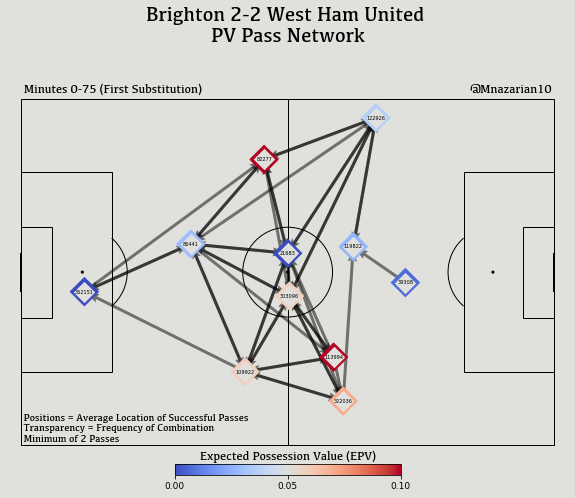

In [35]:
fig, ax = plt.subplots(figsize=(13.5,9))
fig.set_facecolor('#e0e1dd')
fig.patch.set_facecolor('#e0e1dd')
pitch = Pitch(pitch_type='opta', orientation='horizontal', pad_top = 15,
              pitch_color='#e0e1dd', line_color='black', figsize=(16, 11),
              constrained_layout=True, tight_layout=False, linewidth=1)
pitch.draw(ax=ax)
#plt.figure(figsize=(13.5,8))
#fig, ax = pitch.draw()

b = average_loc.epv

#Vmin and Vmax scale for colors displayed from epv
a = plt.scatter(average_loc.x, average_loc.y, s=400, c=b,facecolor='white',lw=1,
                cmap='coolwarm', alpha=1, zorder=2, vmin=0, vmax=0.1,
                marker='D')

#Plot node on top of node to make ring like effect
player = pitch.scatter(average_loc.x, average_loc.y, s=200, c="#e0e1dd",lw=1,
                alpha=1, zorder=2, vmin=0.0, vmax=0.12,
                marker='D', ax=ax)

arrows = pitch.arrows(passes_betweenFinal.x, passes_betweenFinal.y, passes_betweenFinal.x_end,passes_betweenFinal.y_end, ax=ax,
                     width = 3, headwidth = 3, color=color, zorder = 1, alpha = .5)

#Must Change these ticks for every game!
#Color Scaling
cbar = plt.colorbar(a, orientation="horizontal",shrink=0.3, pad=0.01,
             ticks=[0, 0.05, 0.1, 0.4, 0.6, 0.8, 1])
cbar.set_label('Expected Possession Value (EPV)', fontweight= "bold", fontfamily="Kefa", color='black', size=12)
cbar.outline.set_edgecolor('black')
cbar.ax.xaxis.set_tick_params(color='black')
cbar.ax.xaxis.set_tick_params(labelcolor='black')
cbar.ax.tick_params(labelsize=9)
cbar.ax.xaxis.set_label_position('top')

for index, row in average_loc.iterrows():
    pitch.annotate(row.name, xy=(row.x, row.y), 
                   c='black', va='center', ha='center', size=5, ax=ax)
    
plt.text(0,1," Positions = Average Location of Successful Passes\n Transparency = Frequency of Combination\n Minimum of 2 Passes ", 
         color='black',fontsize=10, fontfamily="Kefa", alpha=1, zorder=1)

#Must change these for every game!
plt.text(0.5,102,"Minutes 0-75 (First Substitution)", fontfamily="Kefa", color='black',
               fontsize=12)
plt.text(84,102,"@Mnazarian10", color='black', fontfamily="Kefa", fontsize=12)
ax.set_title("Brighton 2-2 West Ham United \nPV Pass Network", 
             fontsize=20, fontfamily="Kefa", color="black", fontweight = 'bold', y=1.0)

#Check: Numbers on players, axis inversion(x), color scaling, color bar placement, changing font, image size and exporting, rings being colors not entire node